## 1. [Starting Tutorial](https://github.com/minerva-schools/cs156/tree/master/session3_1#1-starting-tutorial)

In [0]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)


In [0]:
# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.1
alpha = 0.0001

In [4]:
# New representation:
x = rbf_kernel(heights, centers, gamma=1 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[3.59155441e-01 8.65887748e-01 9.38005000e-01 4.56576050e-01
  9.98586094e-02 9.81346359e-03]
 [1.31993843e-01 5.35261429e-01 9.75309912e-01 7.98516219e-01
  2.93757700e-01 4.85578213e-02]
 [1.28296036e-02 1.20512717e-01 5.08647519e-01 9.64640293e-01
  8.22012235e-01 3.14742637e-01]
 [4.33334765e-04 9.81346359e-03 9.98586094e-02 4.56576050e-01
  9.38005000e-01 8.65887748e-01]]


In [5]:
# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

Score on training data =  0.9999957340594902


In [6]:
# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


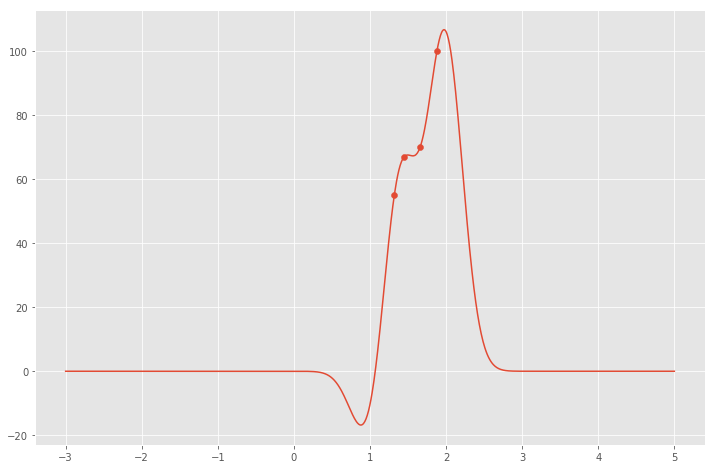

In [7]:
# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights);

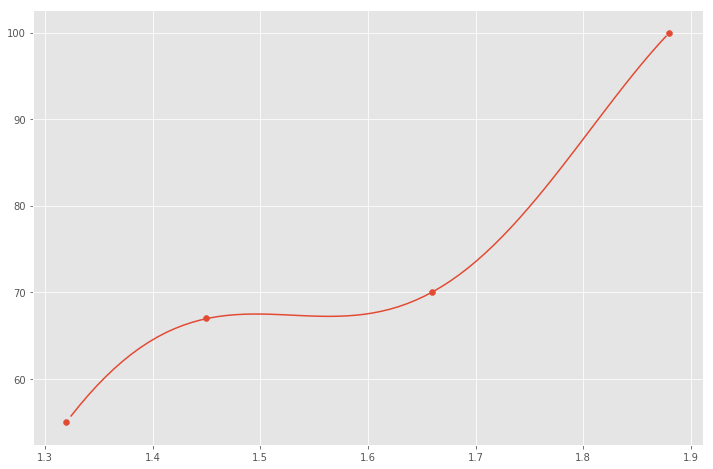

In [8]:
# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.show()

## 2. [Temperatures in Yosemite](https://github.com/minerva-schools/cs156/tree/master/session3_1#2-temperatures-in-yosemite)

In [0]:
#download and extract the data
!wget -q https://course-resources.minerva.kgi.edu/uploaded_files/mke/rj3Edn/yosemite-temperatures.zip
!unzip -q yosemite-temperatures.zip
!rm yosemite-temperatures.zip

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, normalized_mutual_info_score
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *

years = range(2011, 2017)
files = ['yosemite_village/CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

In [0]:
data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

In [0]:
# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

In [0]:
def rbf(minutes, centers, sigma):
  x = np.array(rbf_kernel(np.array(minutes).reshape(-1,1), centers, gamma=1.0/sigma))
  return x

In [0]:
centers = np.linspace(0, 1435, 35).reshape(-1, 1)
sigma = range(1000, 10000, 1000)

In [6]:
ctr = 0
for i in sigma:
  ctr += 1
  x = rbf(data[valid, 1], centers, i)
  y = data[valid, 2]
  X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
  alpha=0.0001
  model = Ridge(alpha=alpha, fit_intercept=True)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("Iteration: ", ctr)
  print("R^2 : ", r2_score(y_test, y_pred))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
  print("----------------------------------------------\n")

Iteration:  1
R^2 :  0.04351466461636755
RMSE:  7.626155535311024
----------------------------------------------

Iteration:  2
R^2 :  0.0435047494782298
RMSE:  7.626195062414491
----------------------------------------------

Iteration:  3
R^2 :  0.043504340164409516
RMSE:  7.626196694156364
----------------------------------------------

Iteration:  4
R^2 :  0.04350408674617223
RMSE:  7.626197704415623
----------------------------------------------

Iteration:  5
R^2 :  0.043504196697051745
RMSE:  7.626197266093223
----------------------------------------------

Iteration:  6
R^2 :  0.0435046133727951
RMSE:  7.626195605002945
----------------------------------------------

Iteration:  7
R^2 :  0.04350564492850695
RMSE:  7.626191492673775
----------------------------------------------

Iteration:  8
R^2 :  0.0435097318000639
RMSE:  7.626175200210455
----------------------------------------------

Iteration:  9
R^2 :  0.0435181344096196
RMSE:  7.626141702790004
------------------------

In [7]:
clf = RidgeCV(alphas=(0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1), fit_intercept=True, cv=10).fit(x, y)
clf.score(x, y)

0.044492976713151

In [8]:
clf.alpha_

0.01

In [9]:
  sigma = 10000  
  x = rbf(data[valid, 1], centers, sigma=sigma)
  y = data[valid, 2]
  X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
  alpha=clf.alpha_
  optimized_model = Ridge(alpha=alpha, fit_intercept=True)
  optimized_model.fit(X_train, y_train)
  y_pred = optimized_model.predict(X_test)
  print("R^2 : ", r2_score(y_test, y_pred))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.04353592396273398
RMSE:  7.626070783367181


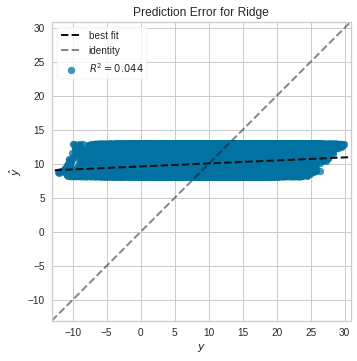

In [19]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(optimized_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

## XGBoostRegressor Model

In [0]:
plt.style.use('ggplot')
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

params = {"max_depth":1, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

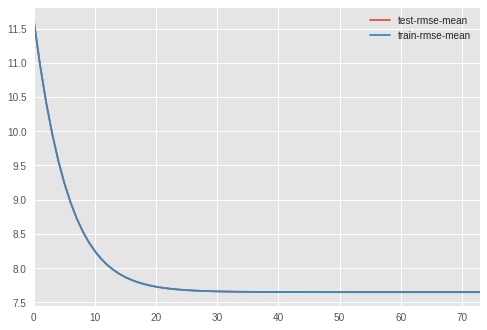

In [21]:
model.loc[:,["test-rmse-mean", "train-rmse-mean"]].plot();

In [18]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(max_depth=1, learning_rate=0.1,
                             objective='reg:squarederror', n_jobs=-1,
                             n_estimators=100, tree_method='gpu_hist',
                             metric='rmse', subsample=0.3)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, metric='rmse', min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.3, tree_method='gpu_hist', verbosity=1)

In [19]:
xgb_preds = model_xgb.predict(X_test)
print("XGB RMSE on validation set: ", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("XGB R^2: ", r2_score(y_test, xgb_preds))

XGB RMSE on validation set:  7.626388550496178
XGB R^2:  0.043456213405546396


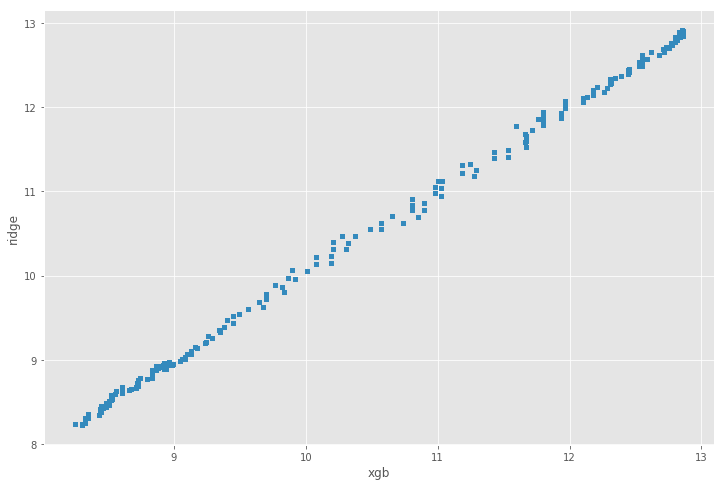

In [23]:
import pandas as pd
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

predictions = pd.DataFrame({"xgb":xgb_preds, "ridge":y_pred})
predictions.plot(x = "xgb", y = "ridge", kind = "scatter");